<a href="https://colab.research.google.com/github/OjChi/DS-Lab/blob/main/Lab_4_Hypothesis_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Experiment 4: Hypothesis Testing
Name: Ojasa Chitre

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from prettytable import PrettyTable

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Engineering/BE/Sem8/DS/Lab/Lab4/federal-firearm-licensees.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (1,2,3,4,6,12,17) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df.columns

Index(['Unnamed: 0', 'Lic Regn', 'Lic Dist', 'Lic Cnty', 'Lic Type',
       'Lic Xprdte', 'Lic Seqn', 'License Name', 'Business Name',
       'Premise Street', 'Premise City', 'Premise State', 'Premise Zip Code',
       'Mail Street', 'Mail City', 'Mail State', 'Mail Zip Code',
       'Voice Phone'],
      dtype='object')

In [ ]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [ ]:
df.columns

Index(['Lic Regn', 'Lic Dist', 'Lic Cnty', 'Lic Type', 'Lic Xprdte',
       'Lic Seqn', 'License Name', 'Business Name', 'Premise Street',
       'Premise City', 'Premise State', 'Premise Zip Code', 'Mail Street',
       'Mail City', 'Mail State', 'Mail Zip Code', 'Voice Phone'],
      dtype='object')

In [ ]:
df.describe()

,Lic Regn,Lic Dist,Lic Cnty,Lic Type,Lic Xprdte,Lic Seqn,License Name,Business Name,Premise Street,Premise City,Premise State,Premise Zip Code,Mail Street,Mail City,Mail State,Mail Zip Code,Voice Phone
count,80190,80190,80190,80190,80190,80190,80191,52423,80190,80190,80190,80190,80190,80189,80190,80190,8.017800e+04
unique,9,66,482,17,74,37241,69607,46276,76531,11646,56,29090,65550,11571,56,29472,7.488900e+04
top,5,59,13,1,0E,3836,WAL-MART STORES EAST LP,EZPAWN,16175 NW 49TH AVE,HOUSTON,TX,59901,508 SW 8TH STREET,BENTONVILLE,TX,727160500,3.105361e+09
freq,22706,3913,1748,34017,2884,12,1315,240,7,415,7795,58,2161,2321,8227,2215,4.040000e+02


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80191 entries, 0 to 80190
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Lic Regn          80190 non-null  object
 1   Lic Dist          80190 non-null  object
 2   Lic Cnty          80190 non-null  object
 3   Lic Type          80190 non-null  object
 4   Lic Xprdte        80190 non-null  object
 5   Lic Seqn          80190 non-null  object
 6   License Name      80191 non-null  object
 7   Business Name     52423 non-null  object
 8   Premise Street    80190 non-null  object
 9   Premise City      80190 non-null  object
 10  Premise State     80190 non-null  object
 11  Premise Zip Code  80190 non-null  object
 12  Mail Street       80190 non-null  object
 13  Mail City         80189 non-null  object
 14  Mail State        80190 non-null  object
 15  Mail Zip Code     80190 non-null  object
 16  Voice Phone       80178 non-null  object
dtypes: object(17

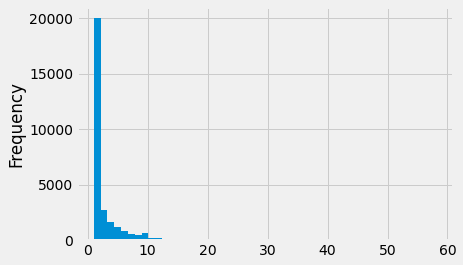

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
df['Premise Zip Code'].value_counts().plot.hist(bins=50)

In [ ]:
df['Premise Zip Code'].value_counts().mean()

2.756617394293572

Here are our hypotheses:

H0:n¯=2.75
 
Ha:n¯≠2.75
 
Let's set our p-level to 0.05. That is, let's say that we're willing to accept a 5% risk that when we reject the null hypothesis we are wrong.

Now we will implement our t-test. Here's a hand implementation first, to see what it looks like. Note that to get the p-value we'll just throw the number at the scipy normal distribution built-in because the normal distribution is non-trivial to simulate computationally.



In [ ]:
X = df['Premise Zip Code'].value_counts()

In [ ]:
import numpy as np
import scipy.stats as stats

def t_value(X, h_0):
    se = np.sqrt(np.var(X) / len(X))
    return (np.mean(X) - h_0) / se

def p_value(t):
    # Two-sided p-value, so we multiply by 2.
    return stats.norm.sf(abs(t))*2

t = t_value(X, 2.75)
p = p_value(t)

In [ ]:
t,p

(0.3570237643291454, 0.7210740152175236)

The  t  score tells us that our result is 0.36 standard deviations away from the average mean estimator result we can expect. 0.36 standard deviations is not a lot at all though! Our  p  value tells us that almost 72% of possible mean estimate values are further away from our expectation than the value that we got.

In other words, a mean value of 2.75 is in the 72nd percentile of closeness.

Since  0.72>0.05 , we fail to reject the null hypothesis  H0 . We conclude that there is strong evidence that  n¯=2.75 —that is, that the mean number of gun shops per US Zip Code is almost 3!

For reference, here is the usual way of performing this test using scipy:

In [ ]:
import scipy.stats as stats

stats.ttest_1samp(a=X, popmean=2.75)

Ttest_1sampResult(statistic=0.35701762773872997, pvalue=0.7210811989731936)

##Conclusion:
Hypothesis testing is used extensively in the literature because it is a relatively simple and powerful tool for making decisions. Hypothesis testing allows us to state what level of confidence we want to have in some observation about our data, then, in testing that observation, determine whether or not we are satisfied that it is correct.

Another way of making this decision is to make it into a chart. For example, we could have randomly recomputed the mean of an increasing number of values in the dataset, and used that to determine how confident we are in our result. So for example, we'll take the mean of a single sample from the dataset; then the mean of two samples from the dataset; then three, and so on. Here's how that would look:

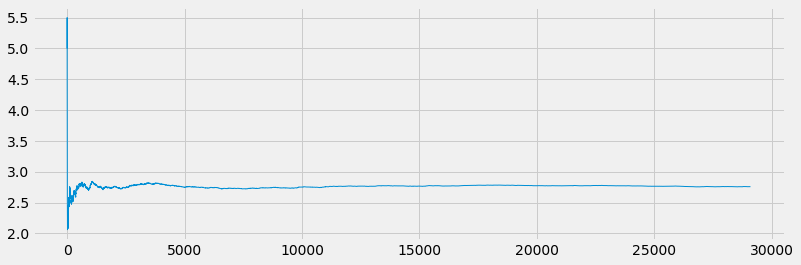

In [ ]:
r = (df['Premise Zip Code'].value_counts().sample(len(df['Premise Zip Code'].unique()) - 1))
pd.Series(r.cumsum() / np.array(range(1, len(r) + 1))).reset_index(drop=True).plot.line(
    figsize=(12, 4), linewidth=1
)

As you can see, the mean of our values stabilizes on the "true" value over time. No matter the amount of variance at the beginning of the distribution, by the end we have a very good idea that the real result is approximately 2.75.

Hypothesis testing is merely way of quantifying how sure we are about this approximation. It's important to do because a computer can't "look" at a graph; we mortals can, be we still need it too sometimes, because the graph is oftentimes ambiguous, and sometimes we need to make a lot of decisions potentially very quickly without necessarily looking at all of the graphs.